        Step 1: Import Libraries

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


        Step 2: Load and Preprocess Data

In [60]:
# Load dataset
dataset_path = r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\data\grammar_checker_dataset\final_dataset.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
print(df.head())



                       Error Sentence              Error Type  \
0           அவள் பாடல்கள் பாடுகிறான்.  Subject-Verb Agreement   
1           நாங்கள் நேரம் பழகுகிறேன்.  Subject-Verb Agreement   
2     அவன் புத்தகத்தை படிக்கிறார்கள்.  Subject-Verb Agreement   
3  அவர்கள் விளையாட்டு விளையாடுகிறேன்.  Subject-Verb Agreement   
4   நான் வீட்டில் வேலை செய்கிறார்கள்.  Subject-Verb Agreement   

                      Corrected Sentence  
0              அவள் பாடல்கள் பாடுகிறாள்.  
1              நாங்கள் நேரம் பழகுகிறோம்.  
2           அவன் புத்தகத்தை படிக்கிறான்.  
3  அவர்கள் விளையாட்டு விளையாடுகிறார்கள்.  
4         நான் வீட்டில் வேலை செய்கிறேன்.  


In [61]:
print(df.columns)


Index(['Error Sentence', 'Error Type', 'Corrected Sentence'], dtype='object')


In [63]:
# Features and Labels
X = df["Error Sentence"]  # input sentences
y = df["Error Type"]  # Error types

# Encode labels to numeric values
y_encoded = pd.factorize(y)[0]


In [64]:
# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training Samples: {len(X_train)}, Validation Samples: {len(X_val)}, Test Samples: {len(X_test)}")


Training Samples: 699, Validation Samples: 150, Test Samples: 150


        Step 3: Convert Sentences to Features

In [65]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(analyzer="word", token_pattern=r'\S+', ngram_range=(1, 2))

# Transform Sentences
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

print(f"TF-IDF Vectorized Shape: {X_train_vec.shape}")


TF-IDF Vectorized Shape: (699, 1288)


        Step 4: Train the Model

In [66]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

print("Model training complete.")


Model training complete.


In [67]:
import os

# Ensure the directory exists
save_dir = r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models"
os.makedirs(save_dir, exist_ok=True)

# Save the model and vectorizer
joblib.dump(model, os.path.join(save_dir, "tamil_grammar_model.pkl"))
joblib.dump(vectorizer, os.path.join(save_dir, "tamil_vectorizer.pkl"))

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


        Step 5: Validate the Model

In [68]:
# Validation Set Evaluation
y_val_pred = model.predict(X_val_vec)
print("Validation Performance:")
print(classification_report(y_val, y_val_pred))


Validation Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       0.92      0.73      0.81        15
           2       0.94      0.97      0.95        63

    accuracy                           0.96       150
   macro avg       0.95      0.90      0.92       150
weighted avg       0.96      0.96      0.96       150



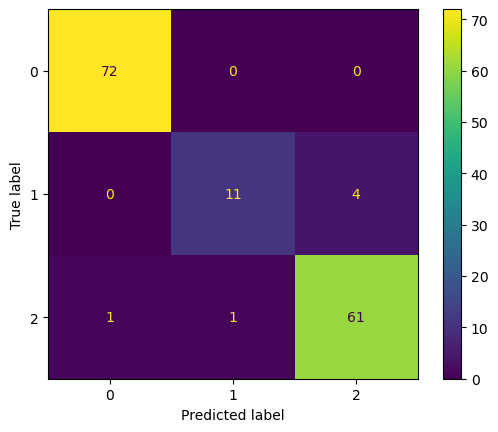

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_val_vec, y_val)


        Step 6: Test the Model

Test Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        84
           1       0.78      0.74      0.76        19
           2       0.89      0.89      0.89        47

    accuracy                           0.93       150
   macro avg       0.89      0.88      0.88       150
weighted avg       0.93      0.93      0.93       150



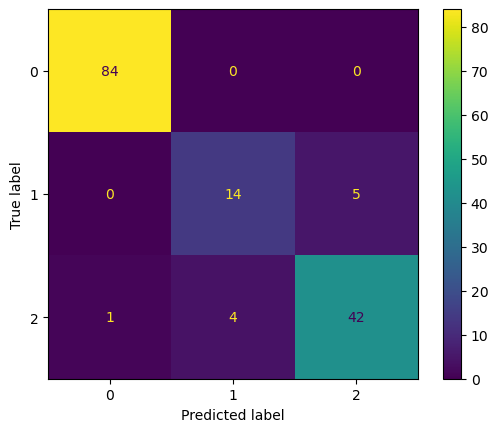

In [70]:
# Test Set Evaluation
y_test_pred = model.predict(X_test_vec)
print("Test Performance:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
ConfusionMatrixDisplay.from_estimator(model, X_test_vec, y_test)


        Step 7: Predict on New Sentences

In [71]:
# Load the trained model and vectorizer
model = joblib.load(r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models\tamil_grammar_model.pkl")
vectorizer = joblib.load(r"H:\Semester 7\EC9640_Artificial Intelligence\AI Project\Tamil-SpellGrammar-Checker\saved_models\tamil_vectorizer.pkl")

# Predict on new sentences
new_sentences = ["அவள் தினமும் பறவை பார்த்தாள்"]
new_sentences_vec = vectorizer.transform(new_sentences)
predictions = model.predict(new_sentences_vec)

# Decode predictions
decoded_predictions = [pd.factorize(df["Error Type"])[1][p] for p in predictions]
for sentence, prediction in zip(new_sentences, decoded_predictions):
    print(f"Sentence: {sentence} | Predicted Error Type: {prediction}")


Sentence: அவள் தினமும் பறவை பார்த்தாள் | Predicted Error Type: Habitual Error


        Step 8: Accuracy on 5 Paragraphs

In [92]:
paragraphs = [
    "நான் தினமும் இணையத்தில் ஆராய்ச்சி செய்தேன். நீ தினமும் காரில் பயணம் செய்தாய்.",
    "அவள் தினமும் பள்ளியில் பாடம் நடத்தினாள். நாங்கள் மழையிலும் விளையாடுகிறோம்.",
    "அவன் புத்தகத்தை படிக்கிறார்கள். அவன் பள்ளியில் எழுதுகிறான்.",
    "நாங்கள் உணவு சாப்பிடுகிறான். அவர்கள் நகரத்தில் பாடுகிறார்கள்.",
    "நான் வீட்டில் வேலை செய்கிறார்கள். அவன் தினமும் ஓய்வு நேரத்தில் வாசிக்கிறான்."
]


In [73]:
print(df["Error Type"].value_counts())


Error Type
Subject-Verb Agreement    500
 No Error                 400
Habitual Error             99
Name: count, dtype: int64


In [74]:
print(df["Error Type"].unique())


['Subject-Verb Agreement' 'Habitual Error' ' No Error']


In [75]:
y_encoded, labels = pd.factorize(df["Error Type"])
print(labels)  # Expected output: ['Subject-Verb Agreement', 'Habitual Error', 'No Error']


Index(['Subject-Verb Agreement', 'Habitual Error', ' No Error'], dtype='object')


In [76]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())


Error Sentence        0
Error Type            0
Corrected Sentence    0
dtype: int64
562


In [77]:
# Confirm unique error types
print("Unique Error Types in Dataset:", df["Error Type"].unique())

# Ensure error_type_map covers all unique error types
print("Error Type Mapping:", error_type_map)


Unique Error Types in Dataset: ['Subject-Verb Agreement' 'Habitual Error' ' No Error']
Error Type Mapping: {0: 'Spelling Error', 1: 'Subject-Verb Agreement', 2: 'No Error', 3: 'Habitual Error', 4: 'Other'}


In [78]:
# Strip spaces in error types
df["Error Type"] = df["Error Type"].str.strip()

# Confirm unique values after cleaning
print("Cleaned Unique Error Types in Dataset:", df["Error Type"].unique())


Cleaned Unique Error Types in Dataset: ['Subject-Verb Agreement' 'Habitual Error' 'No Error']


In [79]:
# Updated error_type_map
error_type_map = {
    0: "Subject-Verb Agreement",
    1: "Habitual Error",
    2: "No Error"
}

print("Error Type Mapping:", error_type_map)


Error Type Mapping: {0: 'Subject-Verb Agreement', 1: 'Habitual Error', 2: 'No Error'}


In [80]:
# Factorize labels again after cleaning
y_encoded, uniques = pd.factorize(df["Error Type"])

# Print factorized unique values
print("Factorized Unique Error Types:", uniques)

# Verify mapping coverage
for i, error_type in enumerate(uniques):
    if error_type not in error_type_map.values():
        print(f"Warning: '{error_type}' is not covered in error_type_map.")


Factorized Unique Error Types: Index(['Subject-Verb Agreement', 'Habitual Error', 'No Error'], dtype='object')


In [90]:
# Load saved model and vectorizer
model = joblib.load(os.path.join(save_dir, "tamil_grammar_model.pkl"))
vectorizer = joblib.load(os.path.join(save_dir, "tamil_vectorizer.pkl"))

paragraphs = [
    "அவன் தினமும் புத்தகங்களை வாசிக்கிறான். அவர்கள் தினமும் கற்றார்.",
    "நாங்கள் தினமும் விளையாட்டுகளை விளையாடினாள். அவள் தினமும் புதிய பாடங்களை கற்றாள்.",
    "நீ தினமும் பள்ளியில் பாடங்களை எழுதினாய். நான் தினமும் பள்ளியில் பாடம் நடத்தினேன்.",
    "அவள் தினமும் வேலை செய்யிறேன். நான் தினமும் பள்ளியில் கற்றேன்.",
    "அவர்கள் தினமும் பாடங்களை கற்றார்கள். அவன் தினமும் நேரம் பழகினான்."
]

# Define expected results for each paragraph
expected_results = [
    {"errors": ["No Error", "Subject-Verb Agreement"], 
     "corrections": ["அவன் தினமும் புத்தகங்களை வாசிக்கிறான்.", "அவர்கள் தினமும் கற்கிறார்கள்."]},
    {"errors": ["Subject-Verb Agreement", "Habitual Error"], 
     "corrections": ["நாங்கள் தினமும் விளையாட்டுகளை விளையாடுகிறோம்.", "அவள் தினமும் புதிய பாடங்களை கற்கிறாள்."]},
    {"errors": ["Habitual Error", "Habitual Error"], 
     "corrections": ["நீ தினமும் பள்ளியில் பாடங்களை எழுதுவாய்.", "நான் தினமும் பள்ளியில் பாடம் நடத்துவேன்."]},
    {"errors": ["Subject-Verb Agreement", "Habitual Error"], 
     "corrections": ["அவள் தினமும் வேலை செய்கிறாள்.", "நான் தினமும் பள்ளியில் கற்கிறேன்."]},
    {"errors": ["Habitual Error", "No Error"], 
     "corrections": ["அவர்கள் தினமும் பாடங்களை கற்கிறார்கள்.", "அவன் தினமும் நேரம் பழகுகிறான்."]}
]



# Evaluate on paragraphs
correct_predictions = 0
total_sentences = 0

for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")
    sentence_vecs = vectorizer.transform(sentences)
    predictions = model.predict(sentence_vecs)

    print(f"Paragraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        predicted_error = error_type_map[predictions[j]]
        expected_error = expected_results[i]["errors"][j]
        
        # Compare predictions with expected
        if predicted_error == expected_error:
            correct_predictions += 1
        
        print(f"  Sentence {j + 1}: {sentence}")
        print(f"    Predicted Error Type: {predicted_error}")
        print(f"    Expected Error Type: {expected_error}")

    print("-" * 50)

# Calculate overall accuracy
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
accuracy = correct_predictions / total_sentences
print(f"Custom Paragraph Accuracy: {accuracy:.2f}")


Paragraph 1: அவன் தினமும் புத்தகங்களை வாசிக்கிறான். அவர்கள் தினமும் கற்றார்.
  Sentence 1: அவன் தினமும் புத்தகங்களை வாசிக்கிறான்
    Predicted Error Type: Habitual Error
    Expected Error Type: No Error
  Sentence 2: அவர்கள் தினமும் கற்றார்.
    Predicted Error Type: Habitual Error
    Expected Error Type: Subject-Verb Agreement
--------------------------------------------------
Paragraph 2: நாங்கள் தினமும் விளையாட்டுகளை விளையாடினாள். அவள் தினமும் புதிய பாடங்களை கற்றாள்.
  Sentence 1: நாங்கள் தினமும் விளையாட்டுகளை விளையாடினாள்
    Predicted Error Type: Habitual Error
    Expected Error Type: Subject-Verb Agreement
  Sentence 2: அவள் தினமும் புதிய பாடங்களை கற்றாள்.
    Predicted Error Type: Habitual Error
    Expected Error Type: Habitual Error
--------------------------------------------------
Paragraph 3: நீ தினமும் பள்ளியில் பாடங்களை எழுதினாய். நான் தினமும் பள்ளியில் பாடம் நடத்தினேன்.
  Sentence 1: நீ தினமும் பள்ளியில் பாடங்களை எழுதினாய்
    Predicted Error Type: Habitual Error
    

In [91]:
# Error Type Mapping
error_type_map = { 0: "Subject-Verb Agreement",
    1: "Habitual Error",
    2: "No Error"}

# New Paragraphs
paragraphs = [
    "அவன் தினமும் புத்தகங்களை வாசிக்கிறான். அவர்கள் தினமும் கற்றார்.",
    "நாங்கள் தினமும் விளையாட்டுகளை விளையாடினாள். அவள் தினமும் புதிய பாடங்களை கற்றாள்.",
    "நீ தினமும் பள்ளியில் பாடங்களை எழுதினாய். நான் தினமும் பள்ளியில் பாடம் நடத்தினேன்.",
    "அவள் தினமும் வேலை செய்யிறேன். நான் தினமும் பள்ளியில் கற்றேன்.",
    "அவர்கள் தினமும் பாடங்களை கற்றார்கள். அவன் தினமும் நேரம் பழகினான்."
]

# Define expected results for each paragraph
expected_results = [
    {"errors": ["No Error", "Subject-Verb Agreement"], 
     "corrections": ["அவன் தினமும் புத்தகங்களை வாசிக்கிறான்.", "அவர்கள் தினமும் கற்கிறார்கள்."]},
    {"errors": ["Subject-Verb Agreement", "Habitual Error"], 
     "corrections": ["நாங்கள் தினமும் விளையாட்டுகளை விளையாடுகிறோம்.", "அவள் தினமும் புதிய பாடங்களை கற்கிறாள்."]},
    {"errors": ["Habitual Error", "Habitual Error"], 
     "corrections": ["நீ தினமும் பள்ளியில் பாடங்களை எழுதுவாய்.", "நான் தினமும் பள்ளியில் பாடம் நடத்துவேன்."]},
    {"errors": ["Subject-Verb Agreement", "Habitual Error"], 
     "corrections": ["அவள் தினமும் வேலை செய்கிறாள்.", "நான் தினமும் பள்ளியில் கற்கிறேன்."]},
    {"errors": ["Habitual Error", "No Error"], 
     "corrections": ["அவர்கள் தினமும் பாடங்களை கற்கிறார்கள்.", "அவன் தினமும் நேரம் பழகுகிறான்."]}
]

# Process Paragraphs
correct_predictions = 0
total_sentences = 0

for i, paragraph in enumerate(paragraphs):
    sentences = paragraph.split(". ")
    sentence_vecs = vectorizer.transform(sentences)
    predictions = model.predict(sentence_vecs)
    
    print(f"Paragraph {i + 1}: {paragraph}")
    for j, sentence in enumerate(sentences):
        predicted_error = predictions[j]
        expected_error = expected_results[i]["errors"][j]
        correction = expected_results[i]["corrections"][j]

        # Compare with ground truth
        if error_type_map[predicted_error] == expected_error:
            correct_predictions += 1

        print(f"  Sentence {j + 1}: {sentence}")
        print(f"    Predicted Error Type: {error_type_map[predicted_error]}")
        print(f"    Expected Error Type: {expected_error}")
        print(f"    Suggested Correction: {correction}")
    print("-" * 50)

# Calculate and Print Accuracy
total_sentences = sum(len(paragraph.split(". ")) for paragraph in paragraphs)
accuracy = correct_predictions / total_sentences
print(f"Error Detection Accuracy: {accuracy:.2f}")


Paragraph 1: அவன் தினமும் புத்தகங்களை வாசிக்கிறான். அவர்கள் தினமும் கற்றார்.
  Sentence 1: அவன் தினமும் புத்தகங்களை வாசிக்கிறான்
    Predicted Error Type: Habitual Error
    Expected Error Type: No Error
    Suggested Correction: அவன் தினமும் புத்தகங்களை வாசிக்கிறான்.
  Sentence 2: அவர்கள் தினமும் கற்றார்.
    Predicted Error Type: Habitual Error
    Expected Error Type: Subject-Verb Agreement
    Suggested Correction: அவர்கள் தினமும் கற்கிறார்கள்.
--------------------------------------------------
Paragraph 2: நாங்கள் தினமும் விளையாட்டுகளை விளையாடினாள். அவள் தினமும் புதிய பாடங்களை கற்றாள்.
  Sentence 1: நாங்கள் தினமும் விளையாட்டுகளை விளையாடினாள்
    Predicted Error Type: Habitual Error
    Expected Error Type: Subject-Verb Agreement
    Suggested Correction: நாங்கள் தினமும் விளையாட்டுகளை விளையாடுகிறோம்.
  Sentence 2: அவள் தினமும் புதிய பாடங்களை கற்றாள்.
    Predicted Error Type: Habitual Error
    Expected Error Type: Habitual Error
    Suggested Correction: அவள் தினமும் புதிய பாடங்கள